In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
archivo_excel = "data.xlsx"  
columna_datos_g1 = "Nivel glucosa 60 min"  

In [5]:
#ejercicio 1D
df_g1 = pd.read_excel(archivo_excel, sheet_name="grupo _1")
datos_g1 = df_g1[columna_datos_g1].dropna() 

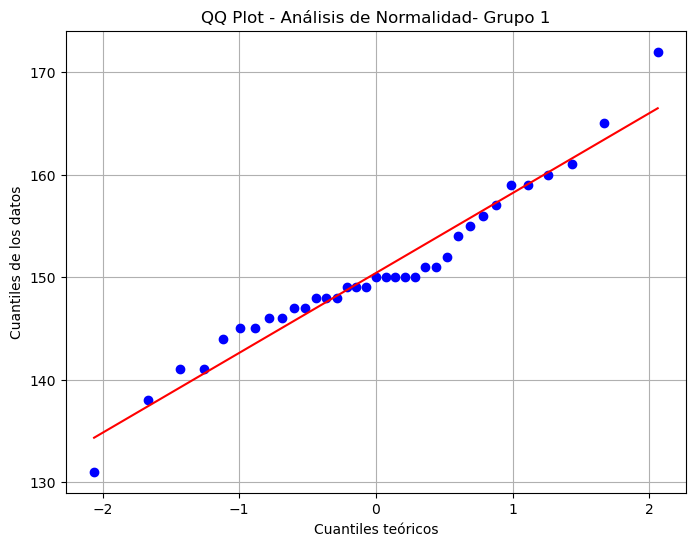

In [7]:
plt.figure(figsize=(8, 6))
stats.probplot(datos_g1, dist="norm", plot=plt)
plt.title("QQ Plot - Análisis de Normalidad- Grupo 1")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los datos")
plt.grid(True)
plt.show()

In [9]:
columna_datos_g2 = "Nivel glucosa 60 min"  

In [11]:
df_g2 = pd.read_excel(archivo_excel, sheet_name="grupo_2")
datos_g2 = df_g2[columna_datos_g2].dropna() 

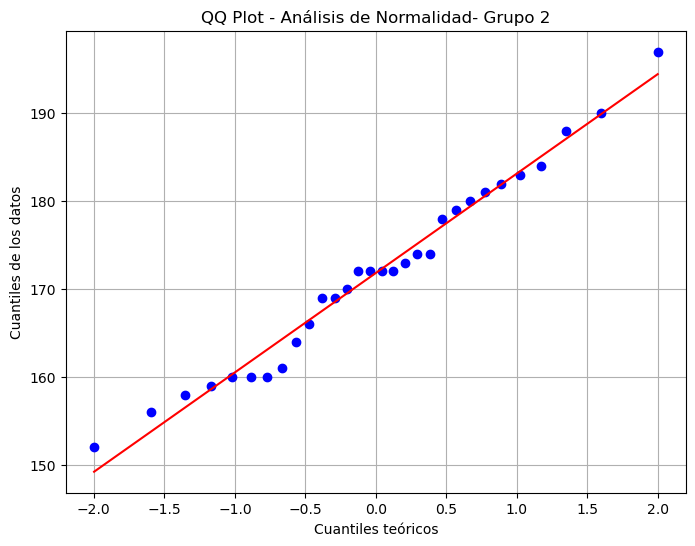

In [13]:
plt.figure(figsize=(8, 6))
stats.probplot(datos_g2, dist="norm", plot=plt)
plt.title("QQ Plot - Análisis de Normalidad- Grupo 2")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de los datos")
plt.grid(True)
plt.show()

In [15]:
estadistico, p_valor = stats.normaltest(datos_g1)

print(f"Estadístico K²: {estadistico}")
print(f"P-valor: {p_valor}")

alpha = 0.05  
if p_valor > alpha:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Estadístico K²: 3.6141410458414556
P-valor: 0.16413426075809492
No se rechaza la hipótesis nula: los datos siguen una distribución normal.


In [17]:
estadistico_2, p_valor_2 = stats.normaltest(datos_g2)


print(f"Estadístico_2 K²: {estadistico_2}")
print(f"P-valor_2: {p_valor_2}")

alpha = 0.05  
if p_valor > alpha:
    print("No se rechaza la hipótesis nula: los datos siguen una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal.")

Estadístico_2 K²: 0.5378866941075515
P-valor_2: 0.7641865478412724
No se rechaza la hipótesis nula: los datos siguen una distribución normal.


In [23]:
#ejercicio 2 A
df_glucosa = pd.read_excel(archivo_excel, sheet_name="ejercicio_2")
glucosa_basal = df_glucosa["Nivel glucosa basal"]
glucosa_60_min = df_glucosa["Nivel glucosa 60 min"]

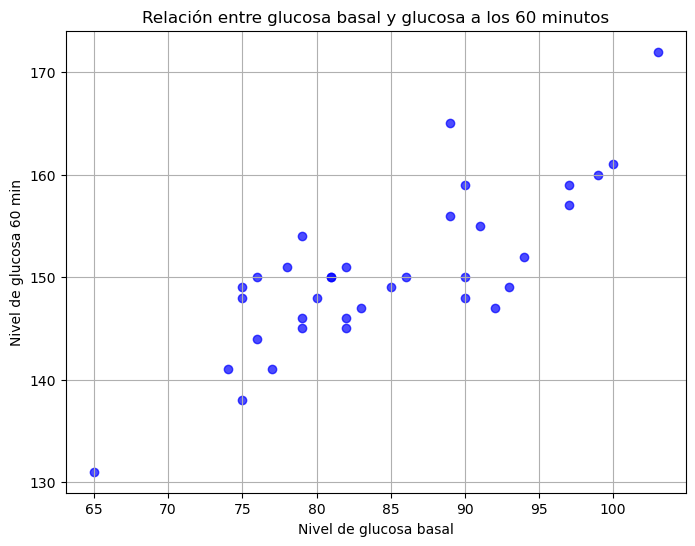

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(glucosa_basal, glucosa_60_min, color='blue', alpha=0.7)
plt.title("Relación entre glucosa basal y glucosa a los 60 minutos")
plt.xlabel("Nivel de glucosa basal")
plt.ylabel("Nivel de glucosa 60 min")
plt.grid(True)
plt.show()

In [29]:
coeficiente_glucosa, p_valor_glucosa = stats.pearsonr(glucosa_basal, glucosa_60_min)
print(f"Coeficiente de correlación de Pearson: {coeficiente_glucosa}")
print(f"P-valor: {p_valor_glucosa}")

Coeficiente de correlación de Pearson: 0.796405256684113
P-valor: 1.0560420013792988e-08


In [31]:
if coeficiente_glucosa > 0:
    relacion = "positiva"
elif coeficiente_glucosa < 0:
    relacion = "negativa"
else:
    relacion = "nula"

print(f"La relación entre las variables es {relacion}.")
if abs(coeficiente_glucosa) >= 0.7:
    print("La relación es fuerte.")
elif abs(coeficiente_glucosa) >= 0.3:
    print("La relación es moderada.")
else:
    print("La relación es débil o inexistente.")

La relación entre las variables es positiva.
La relación es fuerte.


In [37]:
#Ejercicio 2 B

glucosa_basal_RL = glucosa_basal.values.reshape(-1, 1)  
glucosa_60_min_RL = glucosa_60_min.values  

modelo = LinearRegression()
modelo.fit(glucosa_basal_RL, glucosa_60_min_RL)

pendiente = modelo.coef_[0]  
intercepto = modelo.intercept_ 

print(f"Ecuación del modelo lineal: y = {intercepto:.2f} + {pendiente:.2f}x")


Ecuación del modelo lineal: y = 91.38 + 0.70x


In [41]:
nivel_basal_paciente = np.array([[83]])  
prediccion = modelo.predict(nivel_basal_paciente)
print(f"Se estima que el nivel de glucosa a los 60  minutos para un paciente con nivel basal de 83 mg/dL seria de: {prediccion[0]:.2f} mg/dL")

Se estima que el nivel de glucosa a los 60  minutos para un paciente con nivel basal de 83 mg/dL seria de: 149.23 mg/dL


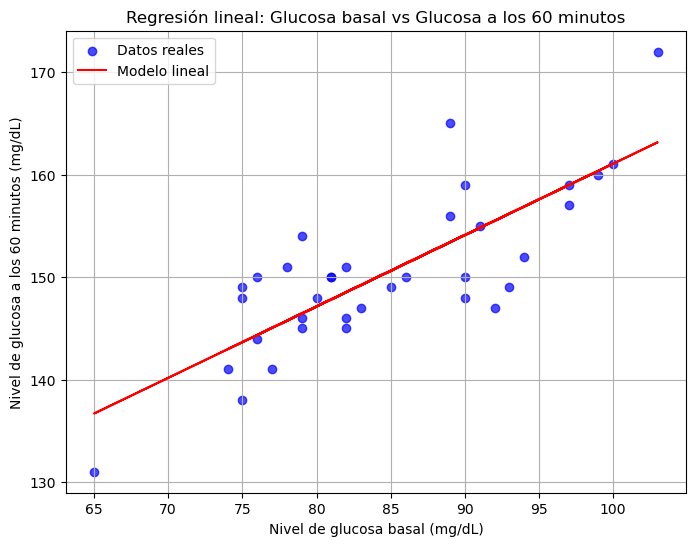

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(glucosa_basal_RL, glucosa_60_min_RL, color='blue', alpha=0.7, label="Datos reales")
plt.plot(glucosa_basal_RL, modelo.predict(glucosa_basal_RL), color='red', label="Modelo lineal")
plt.title("Regresión lineal: Glucosa basal vs Glucosa a los 60 minutos")
plt.xlabel("Nivel de glucosa basal (mg/dL)")
plt.ylabel("Nivel de glucosa a los 60 minutos (mg/dL)")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#Ejercicio 2c

r2 = modelo.score(glucosa_basal_RL, glucosa_60_min_RL)  
print(f"Coeficiente de determinación (R²): {r2:.4f}")

porcentaje_no_explicado = (1 - r2) * 100
print(f"Porcentaje de variación no explicado por el modelo: {porcentaje_no_explicado:.2f}%")


Coeficiente de determinación (R²): 0.6343
Porcentaje de variación no explicado por el modelo: 36.57%


In [49]:
#Ejercicio 2D

delta_x = 5  
delta_y = pendiente * delta_x

print(f"Pendiente (β1): {pendiente:.2f}")
print(f"Por cada aumento de 1 mg/dL en el nivel basal, el nivel de glucosa a los 60 minutos cambia en {pendiente:.2f} mg/dL.")
print(f"Si aumentamos el nivel basal en 5 mg/dL, el nivel de glucosa a los 60 minutos cambiaría en {delta_y:.2f} mg/dL.")


Pendiente (β1): 0.70
Por cada aumento de 1 mg/dL en el nivel basal, el nivel de glucosa a los 60 minutos cambia en 0.70 mg/dL.
Si aumentamos el nivel basal en 5 mg/dL, el nivel de glucosa a los 60 minutos cambiaría en 3.48 mg/dL.


In [51]:
#ejercicio 3A. Hipótesis nula (H0): La media poblacional es igual a 88 mg/dL. Hipótesis alternativa (H1): La media poblacional es diferente de 88 mg/dL
#Se realizo  distribución t-Student al nivel de significancia: alpha = 0.05  para el 95% y alpha = 0.01 para el 99%). 

media_muestral = np.mean(glucosa_basal)
desv_estandar_muestral = np.std(glucosa_basal, ddof=1) 
n = len(glucosa_basal)

media_hipotetica = 88

t_stat = (media_muestral - media_hipotetica) / (desv_estandar_muestral / np.sqrt(n))
print(f"Estadístico t: {t_stat:.4f}")



Estadístico t: -2.2170


In [53]:
gl = n - 1

# p-valor (contraste bilateral)
p_valor_ts = 2 * (1 - stats.t.cdf(abs(t_stat), df=gl))
print(f"P-valor: {p_valor_ts:.4f}")

# Intervalo de confianza al 95%
t_critico_95 = stats.t.ppf(1 - 0.05 / 2, df=gl)
ic_95 = (
    media_muestral - t_critico_95 * (desv_estandar_muestral / np.sqrt(n)),
    media_muestral + t_critico_95 * (desv_estandar_muestral / np.sqrt(n)),
)
print(f"Intervalo de confianza al 95%: {ic_95}")

P-valor: 0.0334
Intervalo de confianza al 95%: (81.64758693301904, 87.72384163840952)


In [55]:
t_critico_99 = stats.t.ppf(1 - 0.01 / 2, df=gl)
ic_99 = (
    media_muestral - t_critico_99 * (desv_estandar_muestral / np.sqrt(n)),
    media_muestral + t_critico_99 * (desv_estandar_muestral / np.sqrt(n)),
)
print(f"Intervalo de confianza al 99%: {ic_99}")

Intervalo de confianza al 99%: (80.60686967940265, 88.76455889202592)


In [61]:
#ejercico 3B
df_contraste = pd.read_excel(archivo_excel, sheet_name="Hoja1")

# Filtrar los datos por grupo
grupo1 = df_contraste[df_contraste["Grupo de control"] == 1]["Nivel glucosa basal"]
grupo2 = df_contraste[df_contraste["Grupo de control"] == 2]["Nivel glucosa basal"]

In [63]:
media1, media2 = grupo1.mean(), grupo2.mean()
var1, var2 = grupo1.var(ddof=1), grupo2.var(ddof=1)
n1, n2 = len(grupo1), len(grupo2)


diferencia_medias = media1 - media2

# standard error
error_estandar_contraste = np.sqrt((var1 / n1) + (var2 / n2))

# freedom
gl = n1 + n2 - 2

In [65]:
t_critico = stats.t.ppf(1 - 0.05 / 2, df=gl)

limite_inferior = diferencia_medias - t_critico * error_estandar_contraste
limite_superior = diferencia_medias + t_critico * error_estandar_contraste
intervalo_confianza = (limite_inferior, limite_superior)

print(f"Diferencia de medias: {diferencia_medias:.2f}")
print(f"Intervalo de confianza al 95%: {intervalo_confianza}")
print(f"Tamaño muestra grupo 1: {n1}, grupo 2: {n2}")
print(f"Error estándar de la diferencia: {error_estandar_contraste:.2f}")

Diferencia de medias: -4.71
Intervalo de confianza al 95%: (-8.72791198605466, -0.7006594425167849)
Tamaño muestra grupo 1: 35, grupo 2: 30
Error estándar de la diferencia: 2.01


In [67]:
if 0 >= limite_inferior and 0 <= limite_superior:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente para concluir que las medias son diferentes.")
else:
    print("Se rechaza la hipótesis nula: existe evidencia de que las medias son significativamente diferentes.")


Se rechaza la hipótesis nula: existe evidencia de que las medias son significativamente diferentes.


In [69]:
#ejercicio 3C
glucosa_basal_p0 = df_contraste["Nivel glucosa basal"]

n = len(glucosa_basal_p0)  
exitos = sum(glucosa_basal_p0 > 95) 
p_muestral = exitos / n


p_0 = 0.15

# Estadístico Z para el contraste
z_stat = (p_muestral - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# p-valor para el contraste bilateral
p_valor_p0 = 2 * (1 - stats.norm.cdf(abs(z_stat)))

In [71]:
z_critico = stats.norm.ppf(1 - 0.02 / 2)  # Valor crítico para el 98%
error_estandar_p0 = np.sqrt((p_muestral * (1 - p_muestral)) / n)
ic_98 = (
    p_muestral - z_critico * error_estandar_p0,
    p_muestral + z_critico * error_estandar_p0
)

# Resultados
print(f"Proporción muestral (p̂): {p_muestral:.4f}")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"P-valor: {p_valor_p0:.4f}")
print(f"Intervalo de confianza al 98%: {ic_98}")

Proporción muestral (p̂): 0.1692
Estadístico Z: 0.4342
P-valor: 0.6641
Intervalo de confianza al 98%: (0.06103809745101678, 0.2774234410105217)


In [73]:
alpha = 0.05
if p_valor_p0 < alpha:
    print("Rechazamos la hipótesis nula: La proporción poblacional no es igual a 0.15.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente para decir que la proporción es diferente de 0.15.")


No se rechaza la hipótesis nula: No hay evidencia suficiente para decir que la proporción es diferente de 0.15.
